## 0. ИМПОРТ НЕОБХОДИМЫХ ФАЙЛОВ

In [ ]:
import os
import sys
import warnings
import re

from datetime import timedelta

import tqdm

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ДАННЫЕ ДОМ РФ

### 1.1. ПЕРВИЧНЫЙ ПРОСМОТР

#### 1.1.1 ПЕРЕСОХРАНЕНИЕ В ФОРМАТЕ .csv

In [ ]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
declaration_msk = pd.read_excel('declaration_dynamics_02102024.xlsx', sheet_name = 'Данные')
declaration_msk.to_csv('declaration_dynamics_02102024.csv', index=False)

In [ ]:
# Выгрузка .csv (МСК)
declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')

<ipython-input-3-fd5556e870d9>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')


In [ ]:
display(declaration_msk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202772 entries, 0 to 202771
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Дата выгрузки                 72898 non-null   object 
 1   ID ЖК                         72898 non-null   object 
 2   ЖК                            72898 non-null   object 
 3   Корпуса                       72898 non-null   object 
 4   Регион Город                  72898 non-null   object 
 5   Округ Направление             72898 non-null   object 
 6   Регион                        72898 non-null   object 
 7   Застройщик                    72898 non-null   object 
 8   Дата начала интервала         72898 non-null   object 
 9   Дата завершения интервала     72898 non-null   object 
 10  Длина интервала, мес.         72898 non-null   object 
 11  Интервал                      72898 non-null   object 
 12  Продано квартир (ед.)         72898 non-null

None

In [ ]:
declaration_msk.describe()

,Продано квартир (ед.),Продано нежилых (ед.),Продано машиномест (ед.),Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано машиномест (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Продано машиномест (руб.),Цена кв. м квартир (руб.),Цена кв. м нежилых (руб.),Цена кв. м машиномест (руб.)
count,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04
mean,12.253340,2.233340,1.501276,660.916994,69.510124,25.035529,1.300772e+08,1.534759e+07,3.088371e+06,1.330158e+05,4.896443e+04,2.073767e+04
std,52.156714,24.085255,10.692234,2841.374521,724.839869,245.516004,1.238192e+09,5.910614e+08,4.433444e+07,1.698146e+05,1.195159e+05,1.083532e+05
min,-5048.000000,-154.000000,-222.000000,-56965.000000,-43279.000000,-14592.000000,-2.137145e+11,-1.080409e+11,-4.329964e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,0.000000,0.000000,91.000000,0.000000,0.000000,1.644266e+07,0.000000e+00,0.000000e+00,1.052750e+05,0.000000e+00,0.000000e+00
75%,11.000000,1.000000,0.000000,579.000000,5.000000,0.000000,1.232684e+08,4.741425e+05,0.000000e+00,2.089320e+05,5.001400e+04,0.000000e+00
max,4820.000000,5514.000000,643.000000,114862.000000,65379.000000,16701.000000,2.139734e+11,1.080409e+11,4.116435e+09,1.999501e+06,1.999944e+06,2.048597e+07


#### 1.1.2 ПРЕДОБРАБОТКА

In [ ]:
# Просмотр столбцов таблицы для выбора интересующих
declaration_msk.columns

Index(['Дата выгрузки', 'ID ЖК', 'ЖК', 'Корпуса', 'Регион Город',
       'Округ Направление', 'Регион', 'Застройщик', 'Дата начала интервала',
       'Дата завершения интервала', 'Длина интервала, мес.', 'Интервал',
       'Продано квартир (ед.)', 'Продано нежилых (ед.)',
       'Продано машиномест (ед.)', 'Продано квартир (кв. м.)',
       'Продано нежилых (кв. м.)', 'Продано машиномест (кв. м.)',
       'Продано квартир (руб.)', 'Продано нежилых (руб.)',
       'Продано машиномест (руб.)', 'Цена кв. м квартир (руб.)',
       'Цена кв. м нежилых (руб.)', 'Цена кв. м машиномест (руб.)',
       'фильтр по числу квартир'],
      dtype='object')

In [ ]:
test_declarations = declaration_msk.copy()

# Отбор необходимых столбцов
test_declarations = test_declarations[[
                                        'ЖК',
                                        'ID ЖК',
                                        'Корпуса',
                                        'Регион',
                                        'Застройщик',
                                        'Округ Направление',
                                        'Дата начала интервала',
                                        'Дата завершения интервала',
                                        'Продано квартир (кв. м.)',
                                        'Продано нежилых (кв. м.)',
                                        'Продано квартир (руб.)',
                                        'Продано нежилых (руб.)',
                                        'Цена кв. м квартир (руб.)'
                                        ]]

# Приведение столбца в формат дат
test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])
test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])

# Отбираем данные на конкретные даты
test_declarations = test_declarations[test_declarations['Дата завершения интервала'] > '2018-12-31']

In [ ]:
test_declarations.head(10)

,ЖК,ID ЖК,Корпуса,Регион,Застройщик,Округ Направление,Дата начала интервала,Дата завершения интервала,Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Цена кв. м квартир (руб.)
0,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-07-31,2019-12-09,39.0,0.0,2420400.0,0.0,62062.0
1,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-12-09,2020-01-10,536.0,0.0,44480428.0,0.0,82986.0
2,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-01-10,2020-02-10,887.0,0.0,70075023.0,0.0,79002.0
3,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-02-10,2020-03-10,1233.0,0.0,98205167.0,0.0,79647.0
4,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-03-10,2020-04-09,1291.0,0.0,101148479.0,0.0,78349.0
5,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-04-09,2020-05-14,1602.0,0.0,128020072.0,0.0,79913.0
6,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-05-14,2020-06-10,671.0,0.0,56709452.0,0.0,84515.0
7,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-06-10,2020-07-10,1532.0,0.0,118095412.0,0.0,77086.0
8,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-07-10,2020-08-10,1752.0,38.0,143378219.0,1555200.0,81837.0
9,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-08-10,2020-09-09,3545.0,20.0,294598417.0,790400.0,83103.0


In [ ]:
# Группировка и сортировка данных
msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Москва'].sort_values(by='Продано квартир (кв. м.)')
new_msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Новая Москва'].sort_values(by='Продано квартир (кв. м.)')
mo_grouped1 = test_declarations[test_declarations['Регион'] == 'Московская область'].sort_values(by='Продано квартир (кв. м.)')

#### 1.1.3 ПОСТРОЕНИЕ ГРАФИКОВ

In [ ]:
# Построение боксплотов
def plot_boxplot(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


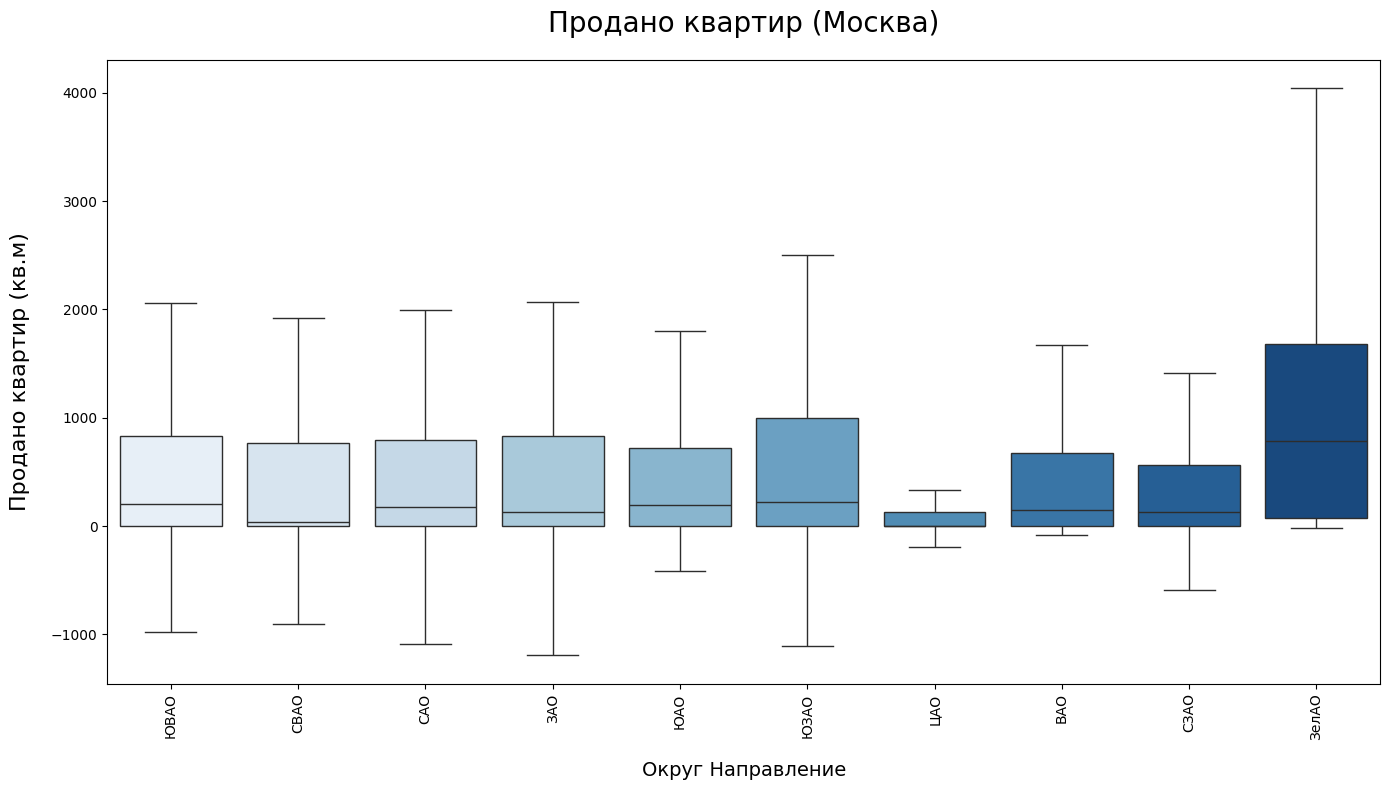

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


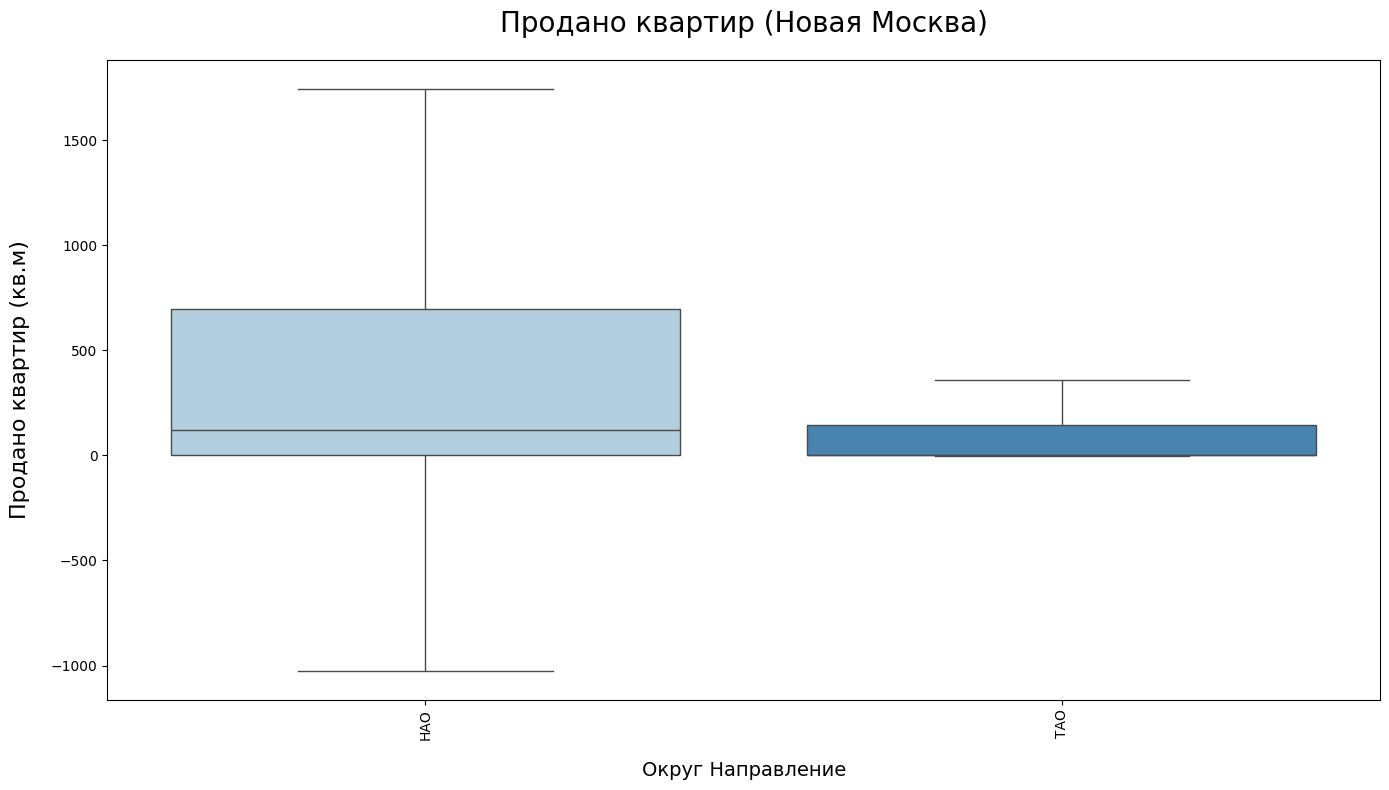

<ipython-input-10-dd7de41974af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


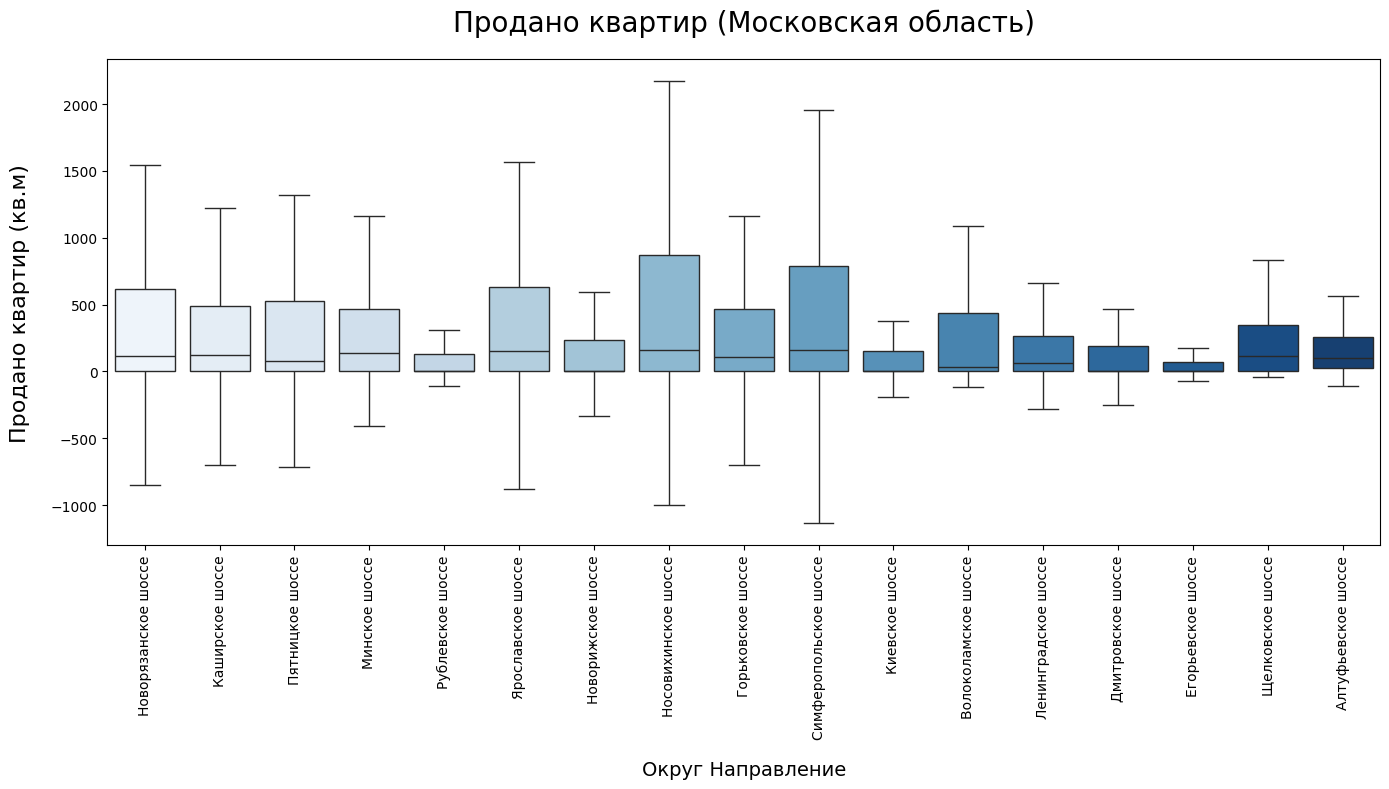

In [ ]:
# Вывод графиков для разных регионов
plot_boxplot(msk_grouped1, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(new_msk_grouped1, 'Продано квартир (Новая Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(mo_grouped1, 'Продано квартир (Московская область)','Округ Направление', 'Продано квартир (кв.м)')

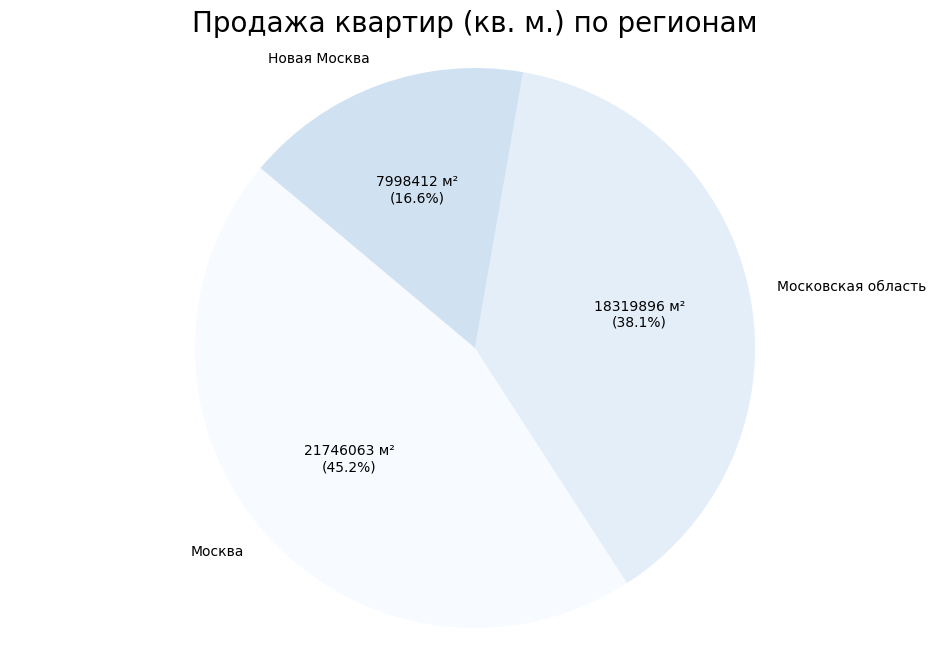

In [ ]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region = test_declarations.groupby('Регион')['Продано квартир (кв. м.)'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region, labels=sales_by_region.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

### 1.2. БОЛЕЕ ДЕТАЛЬНЫЙ АНАЛИЗ

#### 1.2.1 ПРЕДОБРАБОТКА

In [ ]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers = test_declarations.groupby('Застройщик')['Продано квартир (кв. м.)'].sum().nlargest(10)
top_projects = test_declarations.groupby('ЖК')['Продано квартир (кв. м.)'].sum().nlargest(10)

#### 1.2.2 ПОСТРОЕНИЕ ГРАФИКОВ 1

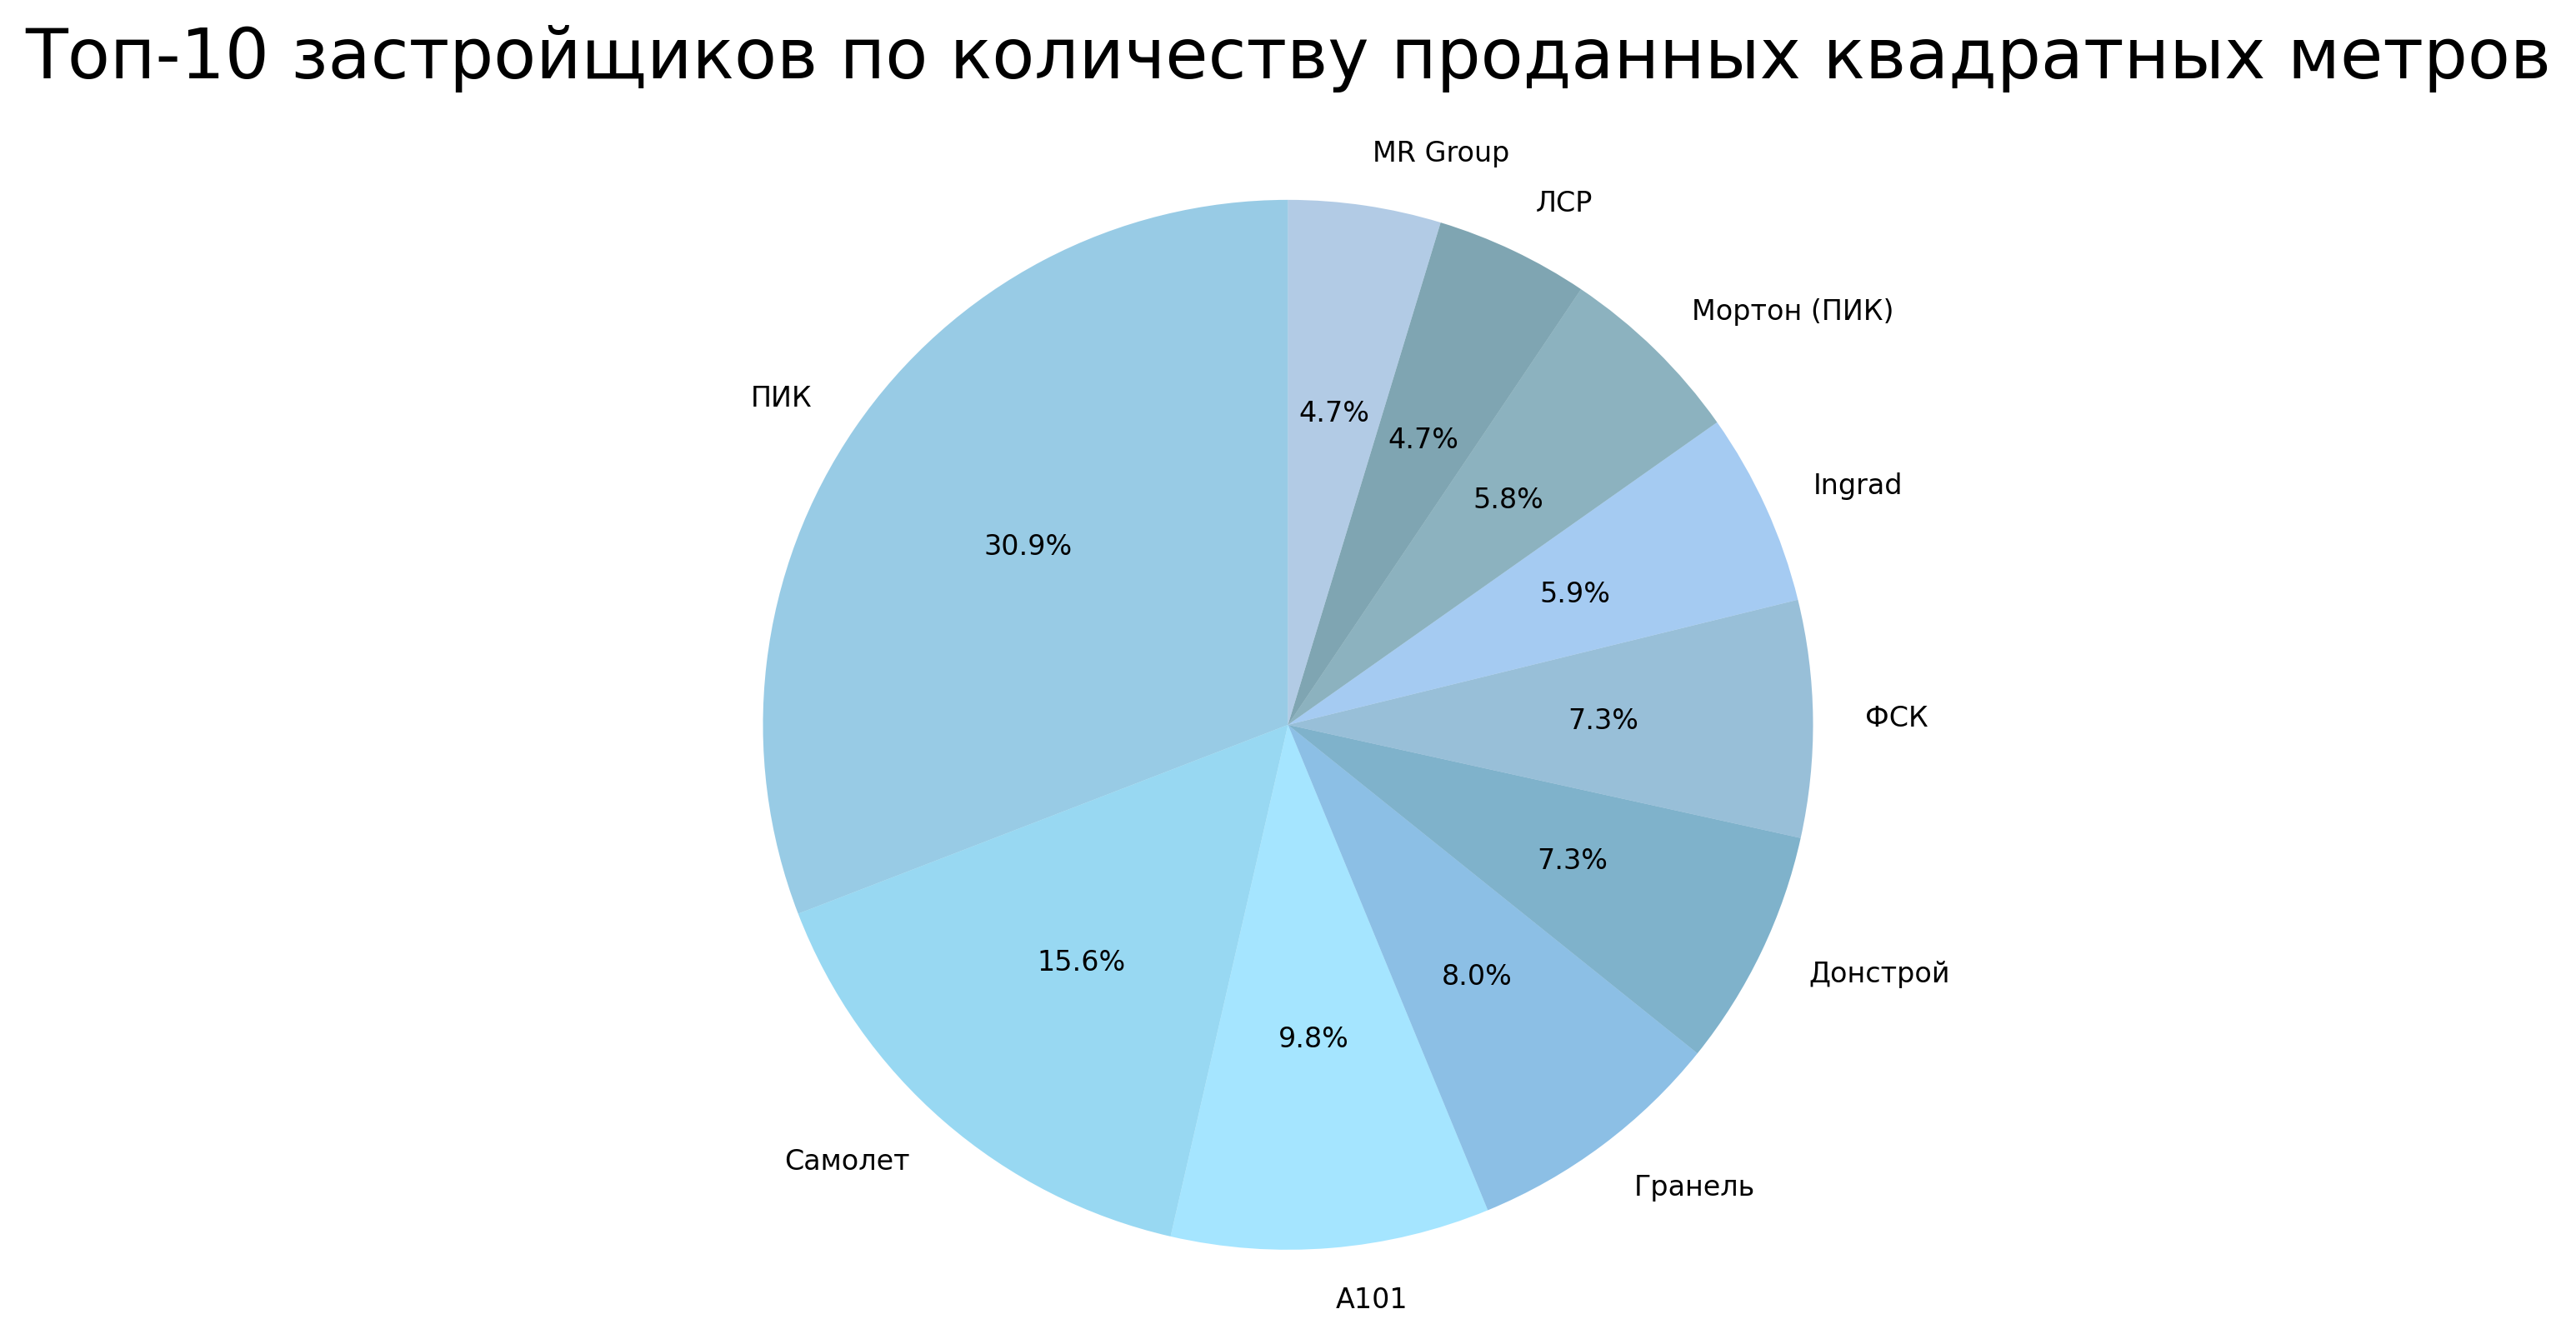

In [ ]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers,
        labels=top_developers.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

# Сохранение графика в высоком качестве
plt.savefig('top1_developers_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение графика
plt.show()

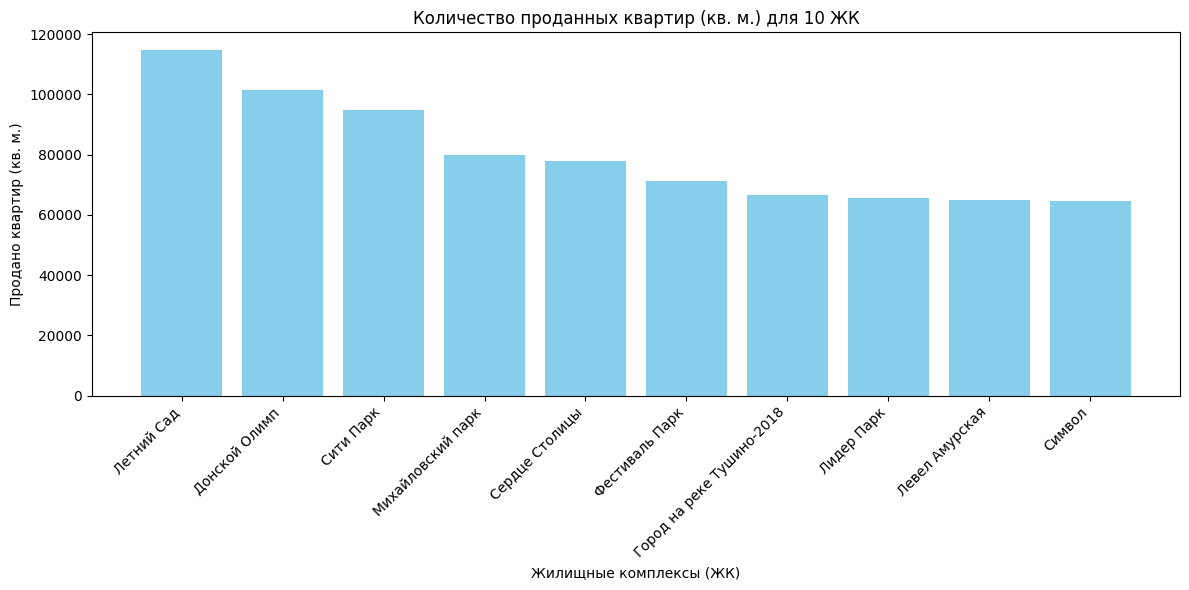

In [ ]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk = test_declarations.nlargest(10, 'Продано квартир (кв. м.)')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk['ЖК'], top_10_jk['Продано квартир (кв. м.)'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 1.2.3 ПОСТРОЕНИЕ ИНТЕРПОЛЯЦИИ

In [ ]:
# Группируем по ЖК и рассчитываем сумму, а также количество уникальных корпусов
summary = test_declarations.groupby('ЖК').agg({
                                            'Продано квартир (кв. м.)': 'sum',
                                            'Корпуса': 'nunique' # Количество уникальных корпусов
                                            }).reset_index()

In [ ]:
def interpolate_sales_by_month(test_declarations):
    results = []

    # Преобразуем столбцы с датами в формат datetime
    test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])
    test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])

    # Проходим по каждому ЖК
    for _, row in test_declarations.iterrows():
        start_date = row['Дата начала интервала']
        end_date = row['Дата завершения интервала']
        total_sales = row['Продано квартир (кв. м.)']
        name = row['ЖК']
        region = row['Регион']
        okrug = row['Округ Направление']
        developer = row['Застройщик']
        corpus = row['Корпуса']
        ID = row['ID ЖК']
        price = row['Цена кв. м квартир (руб.)']

        # Рассчитываем продажи за день
        total_days = (end_date - start_date).days + 1
        sales_per_day = total_sales / total_days if total_days > 0 else 0

        # Создаем список месяцев в интервале
        months = pd.date_range(start_date, end_date, freq='MS')

        # Если интервал в пределах одного месяца или меньше
        if len(months) == 0 or (start_date.year == end_date.year and start_date.month == end_date.month):
            results.append({
                'project': name,
                'year': start_date.year,
                'months': start_date.month,
                'sales_live': total_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })
            continue

        # Обрабатываем каждый месяц
        for i, month_start in enumerate(months):
            # Определяем начало и конец периода для текущего месяца
            if i == 0:  # Первый месяц
                period_start = start_date
            else:
                period_start = month_start

            if i == len(months) - 1:  # Последний месяц
                period_end = end_date
            else:
                period_end = month_start + pd.offsets.MonthEnd(0)

            # Считаем дни и продажи за месяц
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

        # Обработка последнего месяца, если он не был включен в цикл
        if end_date > (months[-1] + pd.offsets.MonthEnd(0)):
            period_start = months[-1] + pd.offsets.MonthEnd(0) + pd.Timedelta(days=1)
            period_end = end_date
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

    # Создаем и группируем результирующий датафрейм
    result_df = pd.DataFrame(results)
    result_df = result_df.groupby(['project', 'year', 'months', 'developer', 'region', 'okrug', 'corpus', 'ID', 'price'])['sales_live'].sum().reset_index()

    # Сортируем результаты
    result_df = result_df.sort_values(['project', 'year', 'months'])
    return result_df

In [ ]:
# Устанавливаем формат вывода чисел
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Применяем функцию интерполяции и выводим результат
result = interpolate_sales_by_month(test_declarations)
print(result)

                       project  year  months     developer  \
0       31-й квартал (Пушкино)  2019       7  Профи Инвест   
1       31-й квартал (Пушкино)  2019       9  Профи Инвест   
2       31-й квартал (Пушкино)  2019      10  Профи Инвест   
3       31-й квартал (Пушкино)  2019      11  Профи Инвест   
4       31-й квартал (Пушкино)  2019      12  Профи Инвест   
...                        ...   ...     ...           ...   
113122      Яуза Парк (Мытищи)  2024       8           ПИК   
113123      Яуза Парк (Мытищи)  2024       8           ПИК   
113124      Яуза Парк (Мытищи)  2024       8           ПИК   
113125      Яуза Парк (Мытищи)  2024       8           ПИК   
113126      Яуза Парк (Мытищи)  2024       8           ПИК   

                    region              okrug  \
0       Московская область  Ярославское шоссе   
1       Московская область  Ярославское шоссе   
2       Московская область  Ярославское шоссе   
3       Московская область  Ярославское шоссе   
4       Мо

In [ ]:
df_grouped = result.copy()
df_grouped.head(10)

,project,year,months,developer,region,okrug,corpus,ID,price,sales_live
0,31-й квартал (Пушкино),2019,7,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.455
1,31-й квартал (Пушкино),2019,9,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
2,31-й квартал (Пушкино),2019,10,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.159
3,31-й квартал (Пушкино),2019,11,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
4,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,2.659
5,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,82986.000,536.000
6,31-й квартал (Пушкино),2020,1,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79002.000,887.000
7,31-й квартал (Пушкино),2020,2,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79647.000,1233.000
8,31-й квартал (Пушкино),2020,3,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,78349.000,1291.000
9,31-й квартал (Пушкино),2020,4,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79913.000,1602.000


In [ ]:
# Группировка обновленных данных
msk_grouped2 = df_grouped[df_grouped['region'] == 'Москва'].sort_values(by='sales_live')
new_msk_grouped2 = df_grouped[df_grouped['region'] == 'Новая Москва'].sort_values(by='sales_live')
mo_grouped2 = df_grouped[df_grouped['region'] == 'Московская область'].sort_values(by='sales_live')

#### 1.2.4 ПОСТРОЕНИЕ ГРАФИКОВ 2

In [ ]:
# Построение боксплотов
def plot_boxplot2(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


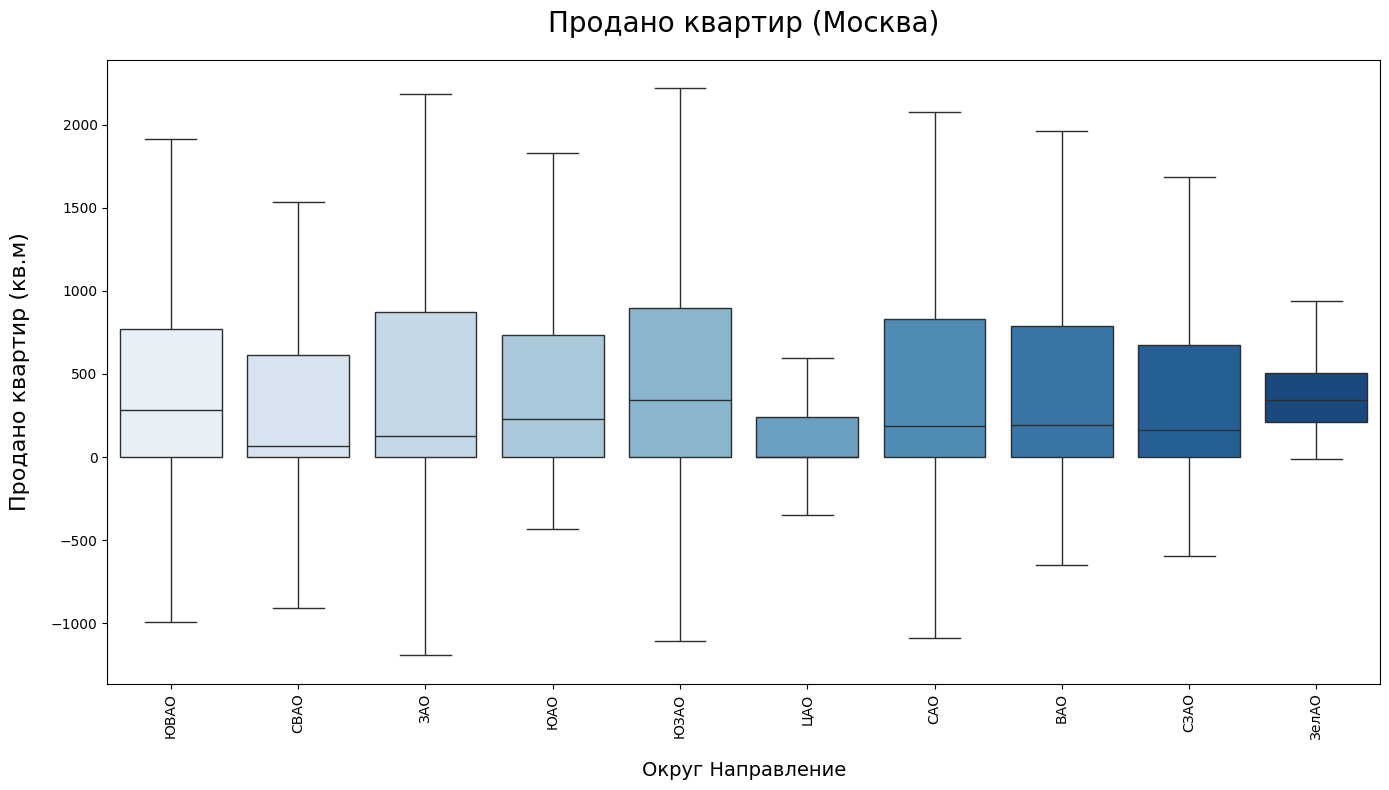

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


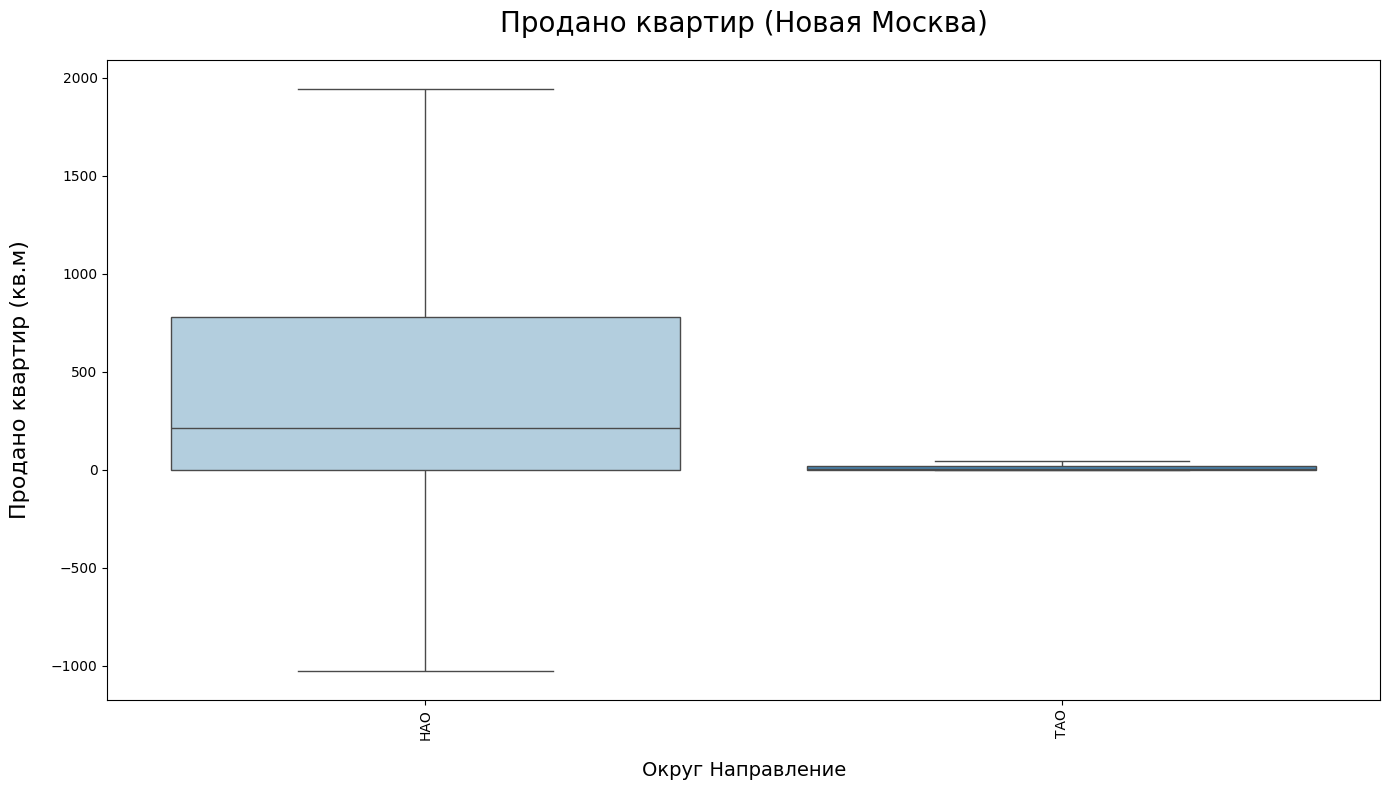

<ipython-input-21-a2f723f875c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


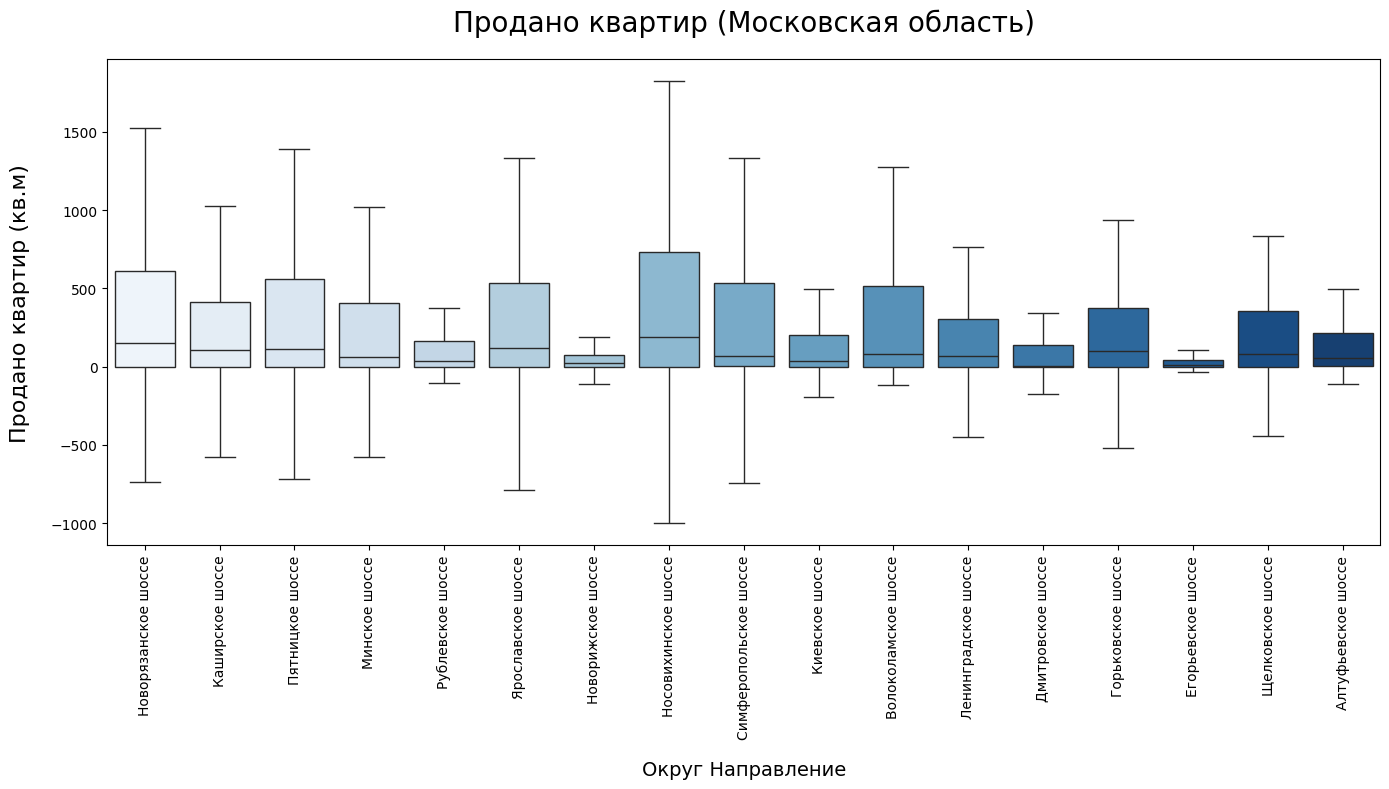

In [ ]:
# Вывод графиков для разных регионов
plot_boxplot2(msk_grouped2, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(new_msk_grouped2, 'Продано квартир (Новая Москва)','Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(mo_grouped2, 'Продано квартир (Московская область)', 'Округ Направление', 'Продано квартир (кв.м)')

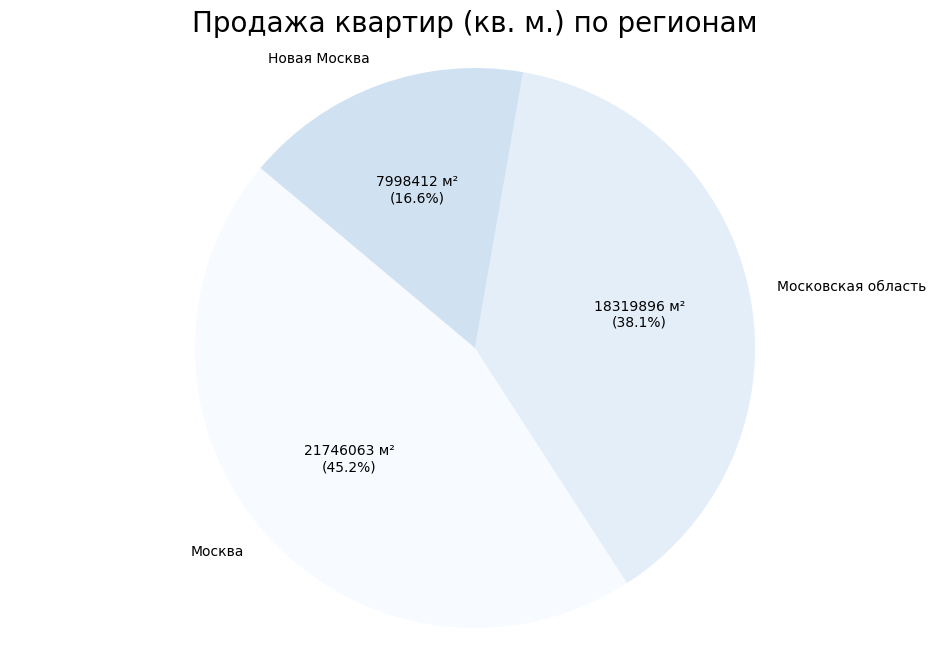

In [ ]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region2 = df_grouped.groupby('region')['sales_live'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region2, labels=sales_by_region2.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region2), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

#### 1.2.5 РАСЧЁТЫ

In [ ]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers2 =df_grouped.groupby('developer')['sales_live'].sum().nlargest(10)
top_projects = df_grouped.groupby('project')['sales_live'].sum().nlargest(10)

#### 1.2.6 ПОСТРОЕНИЕ ГРАФИКОВ 3

(-1.099999349235515,
 1.0999999688808946,
 -1.0999999471387698,
 1.0999999974827985)

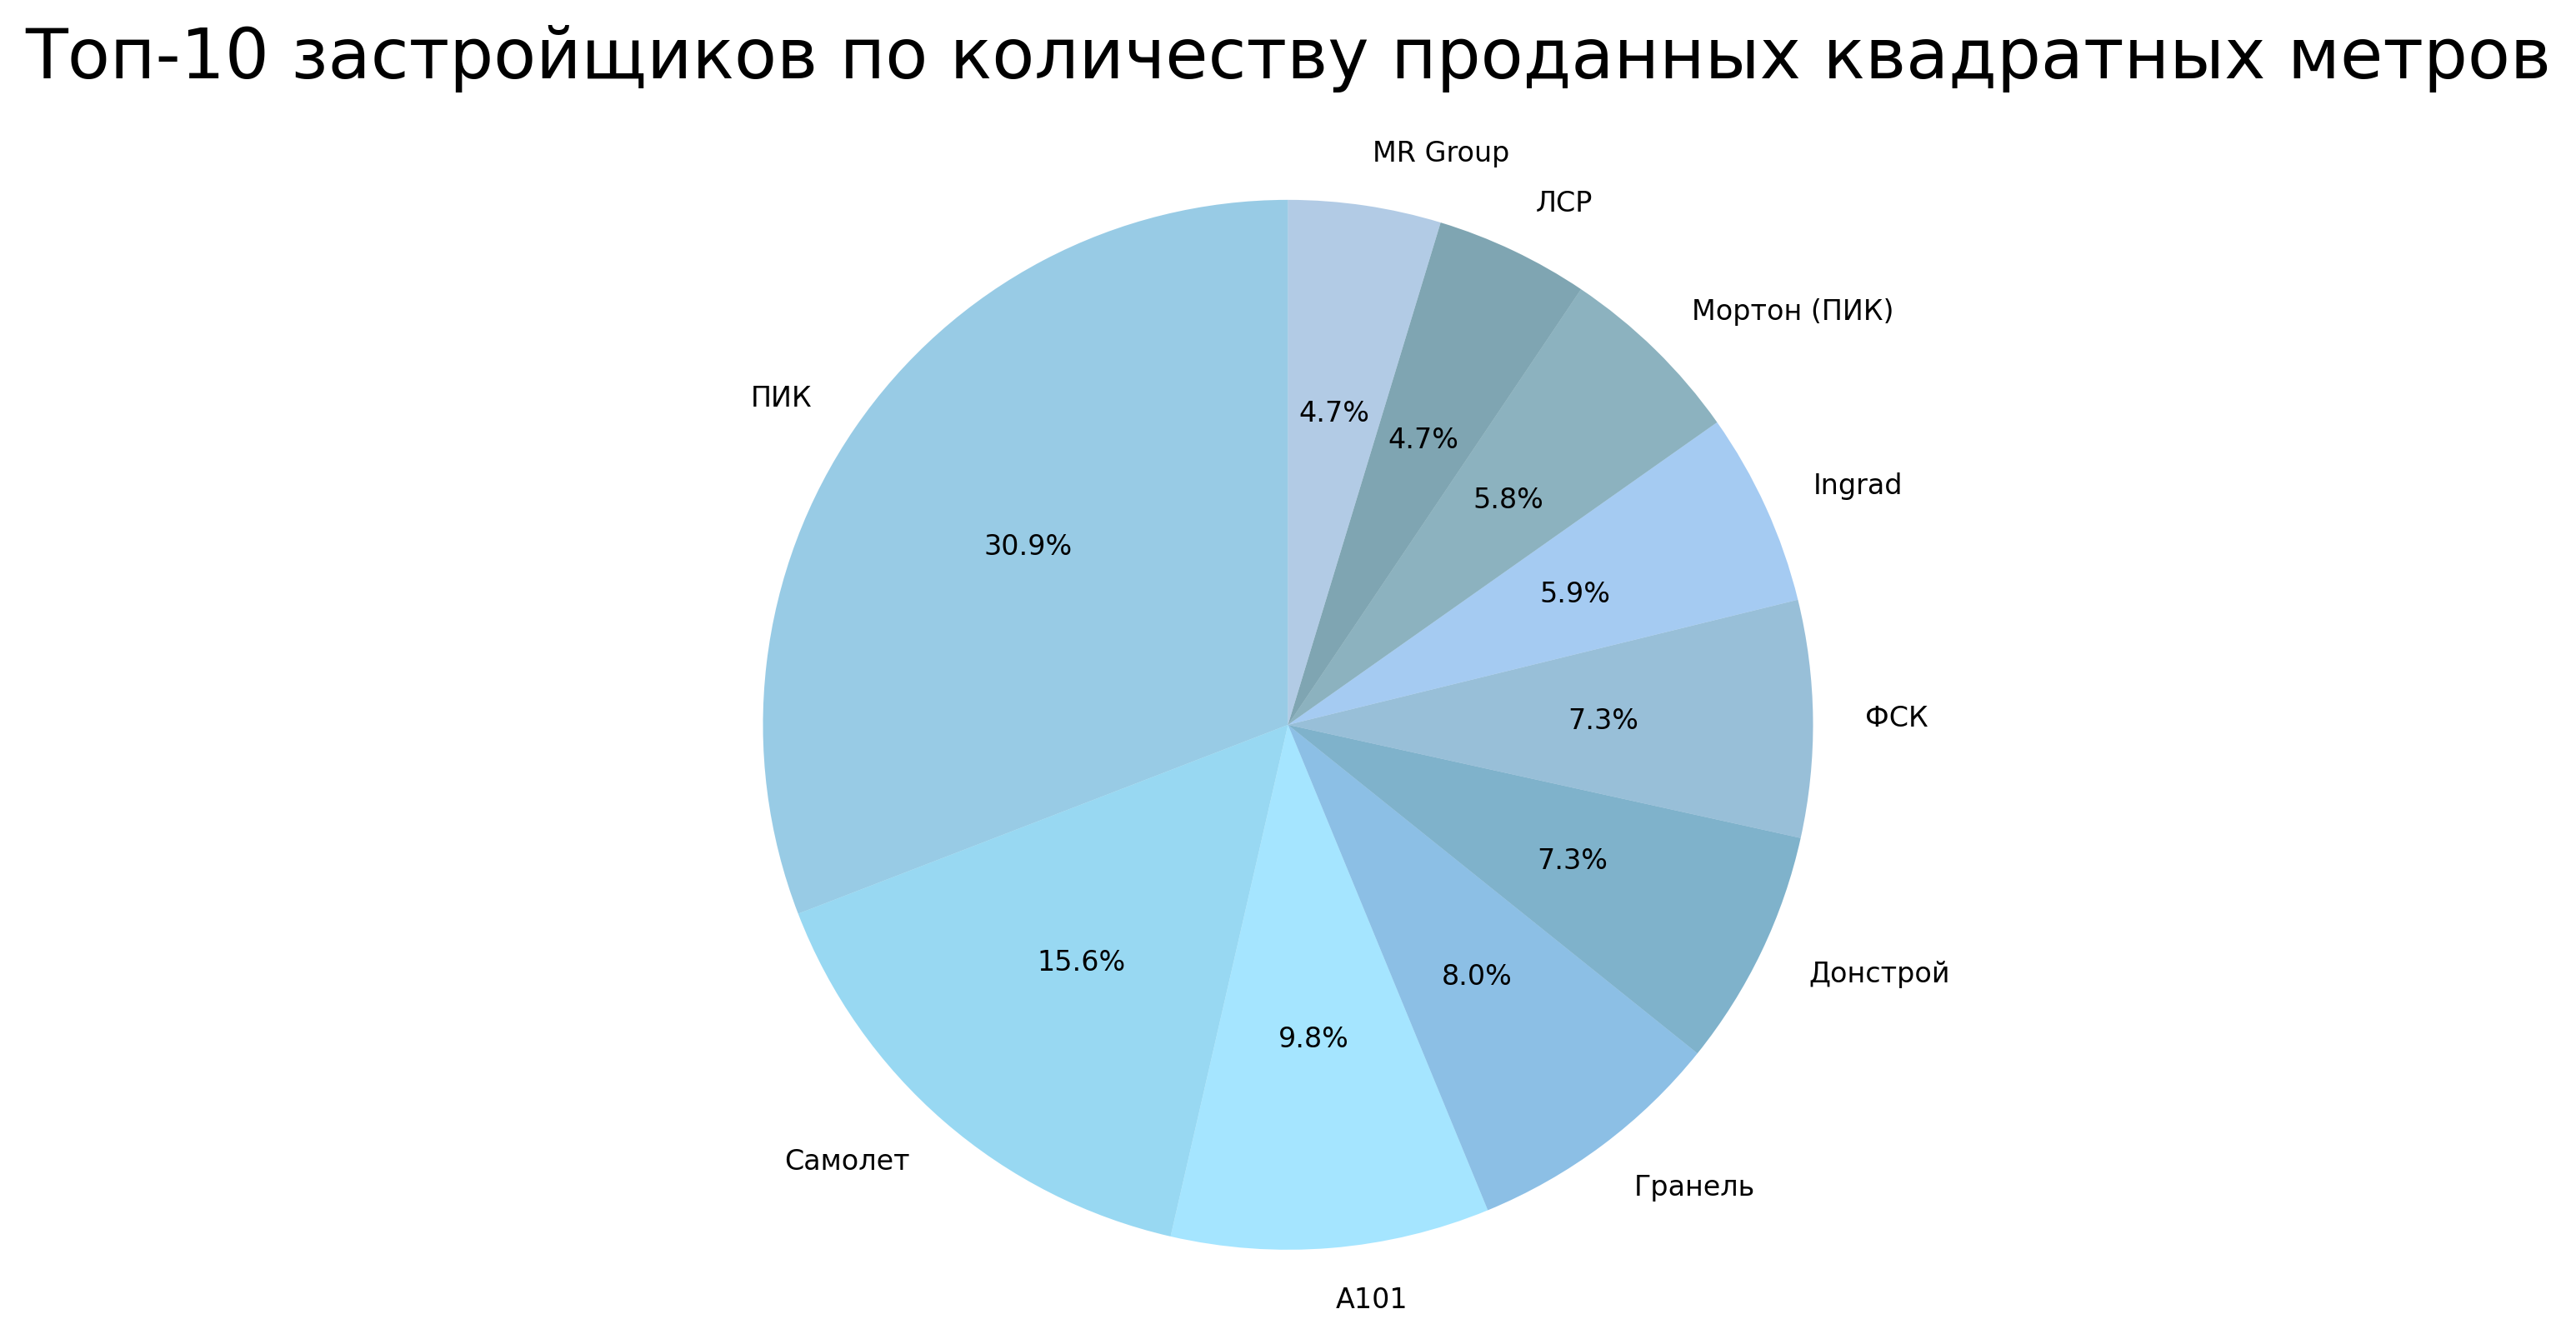

In [ ]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers2,
        labels=top_developers2.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers2)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

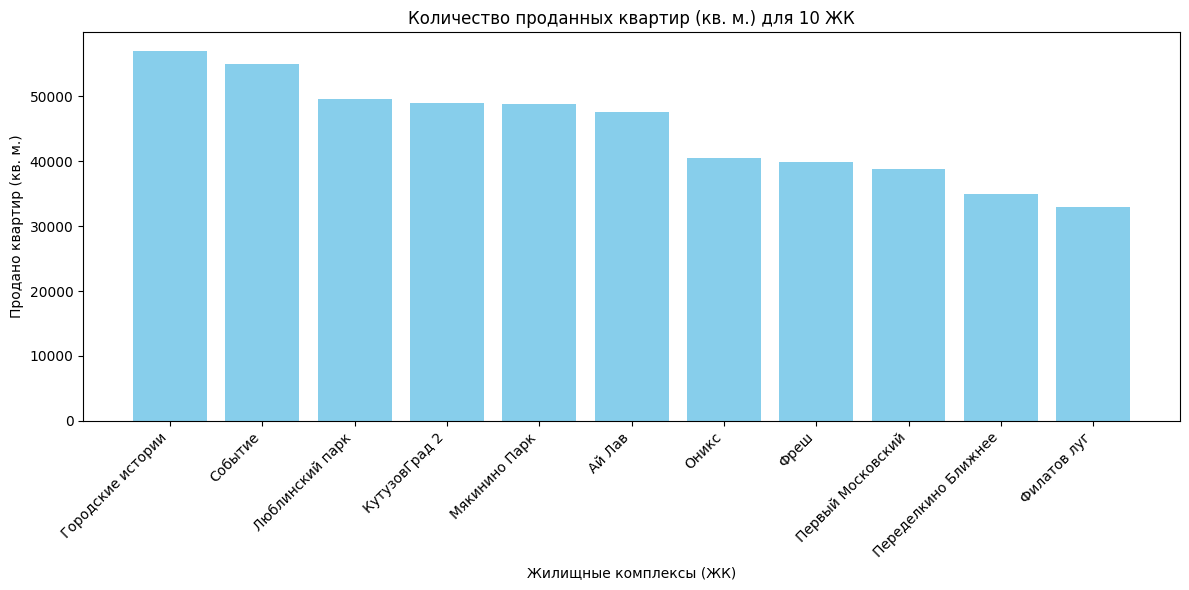

In [ ]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk2 = df_grouped.nlargest(15, 'sales_live')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk2['project'], top_10_jk2['sales_live'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113127 entries, 0 to 113126
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   project     113127 non-null  object 
 1   year        113127 non-null  int64  
 2   months      113127 non-null  int64  
 3   developer   113127 non-null  object 
 4   region      113127 non-null  object 
 5   okrug       113127 non-null  object 
 6   corpus      113127 non-null  object 
 7   ID          113127 non-null  object 
 8   price       113127 non-null  float64
 9   sales_live  113127 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 8.6+ MB
